<a href="https://colab.research.google.com/github/thiagolopes97/ITA/blob/main/Aula2_RegLin_Log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Logo ITA" width="500" src="https://logodownload.org/wp-content/uploads/2018/01/ita-logo.png">

*Autor do material:* **Thiago Gonçalves Guimarães Lopes**

*Desenvovlido para a Disciplina:* **CT-600 Estágio Docência**

#### **Aula 2 - Regressão Linear e Regressão Logística**

---

# Fundamento da Regressão Linear e Logística

---

O modelo linear é uma modelo que utiliza commbinações lineares das características da base de dados. Este por sua vez é definindo como [1,2]:
$$\hat{f}(\mathbf{x},\mathbf{w})=w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n  $$
no qual $\hat{f}$ é a função aproximadora do método, $n$ o número de características, $w = (w_1 , ..., w_n )$ o vetor
com os coeficientes (ou pesos dos atributos) e $w_0$ é o termo escalar.

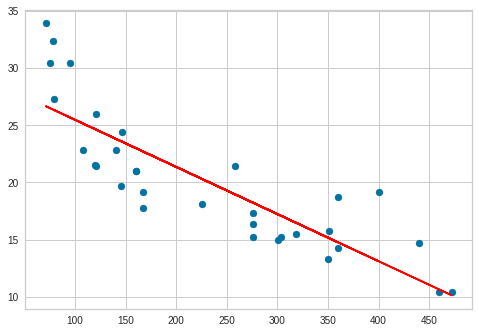


Existem diversos modelos lineares distintos, cada qual com sua especificidade e parâmetro distinto. Consultar [Linear Models](<https://scikit-learn.org/stable/modules/linear_model.html>) [2].

A qualidade de um estimador em fazer previsões é mediada por uma função de custo, que avalia o quão bem uma estimativa se aproxima do esperado [3,4]. A função
de custo é usada para aprimorar o modelo, que tende a minimizá-la [3]. 

Por mais que cada algoritmo possa possuir uma função de custo, em problemas de regressão geralmente ela está associada ao erro quadrático médio, representado abaixo [4]:
$$ MSE\left ( \hat{f} \right ) = \frac{1}{n} \sum_{i=1}^{n}\left ( y_i - \hat{f}(\mathbf{x}_i) \right )^2$$

no qual $n$ é o número de entradas do conjunto avaliado, $y_i$ é o valor real e $\hat{f}(\mathbf{x}_i)$ o valor previsto pelo modelo.

O $MSE$ está vinculado com o $RSME$, que é a medida de desempenho típica em problemas de regressão [3]. O $RSME$ é para quantificar os erros de um modelo de ML em suas previsões, dando um peso maior aos
grandes erros [1]. 
$$RMSE(\hat{f})=\sqrt{MSE(\hat{f})} $$

Outra medida de desempenho empregada nesta projeto é o coeficiente de determinação $R^2$, que representa a proporção de variância explicada pelas variáveis[3,4]. Assim, o $R^2$ explica o quão bem as amostras nunca vistas pelos modelos serão previstas por ele. A expressão abaixo representa como o $R^2$ é calculado normalmente:
$$R^{2}\left ( y, \hat{f} \right ) = 1 - \frac{\sum_{i=1}^{n}\left ( y_i - \hat{f}\left ( \mathbf{x}_i \right ) \right )^2}{\sum_{i=1}^{n}\left ( y_i - \overline{y} \right )^2}$$

no qual $\overline{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$.

Já na regressão logística o modelo calcula a soma ponderada das características de entrada e soma-os a um termo olarizador ($w_0$) [5]. Esta função calcula a probabilidade em formato de uma função logística. Matematicamente, este modelo é descrito por [1]:
$$ \hat{f}(\mathbf{x},\mathbf{w}) = \sigma (\mathbf{x}.\mathbf{w})$$

sendo $\mathbf{w}.\mathbf{x}$ é o produto escalar
entre o o vetor de pesos e de características e $\sigma$ a função logística descrita por $\sigma(x) = \frac{1}{1+e^{-x}}$.

**Referência:**
* [1] GÉRON, A. **Mãos à Obra Aprendizado de Máquina com Scikit-Learn e TensorFlow: Conceitos, ferramentas e técnicas para construção de sistemas inteligentes**. [S.l.]: Alta Books, 2019. Traduzido por Rafael Contatori. ISBN 9788550803814.
* [2] SCIKIT-LEARN. **Linear Models**. 2020. Disponível
em: <https://scikit-learn.org/stable/modules/linear_model.html>
* [3] BIGOTO, M. A. R. **Implementação de modelos de machine learning para predição de temperaturas críticas de supercondutores**. 2020. Disponível em: <https://github.com/muriloafonso/TG_ENG_FISICA>.
* [4] FACELI, K. et al. **Inteligência artificial: Uma abordagem de aprendizado de máquina**. 2011.
* [5] LOPES, T. G. G. **Análise comparativa de modelos de Machine Learning na predição de Câncer de pele**. 2020. Disponível em: <https://github.com/thiagolopes97/TCC-ThiagoLopes/blob/main/TCC_ThiagoLopes_Final.pdf>.

# Regressão Linear - Preço de casas em Boston

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline


# Normalmente as estruturas a serem analisadas veem em um formato CSV, EXCEL - Estes casos são mais fáceis de
# lidar e será mostrado seus procedimentos posteriormente.
dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [2]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
dataset.get('data')

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
# df = DataFrame
df = pd.DataFrame(dataset.get('data'))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Nomear as colunas do Dataframde
df.columns = dataset.get('feature_names')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adicionar uma coluna ao Dataframe
df['target'] = dataset.get('target')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Separar os valores de atributo e alvo

X = df[['AGE']]
y = df['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
# Chamar a função do Modelo

LinReg = LinearRegression()
print(LinReg)
print(type(LinReg))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
<class 'sklearn.linear_model._base.LinearRegression'>


In [9]:
# Treinar o modelo

LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Preizer os valores de teste

y_pred = LinReg.predict(X_test)
print(y_pred)

[25.06196251 21.30071366 29.46314606 26.74668856 20.97421636 19.4723288
 18.40141767 29.41090649 23.91269203 19.45926891 18.78015453 20.21674264
 26.09369396 24.56568662 19.7988261  18.40141767 20.41264101 21.75780987
 29.00604984 19.60292772 27.1515452  19.91636512 21.36601312 22.28020555
 24.14777008 18.40141767 18.79321442 29.21500811 22.94626003 18.62343583
 19.83800577 27.7914799  18.72791497 19.00217269 28.96687017 22.77648144
 18.40141767 27.66088098 18.74097486 30.677716   30.61241654 27.29520401
 30.59935665 27.39968315 25.29704056 18.40141767 29.04522952 22.11042695
 18.40141767 19.11971172 27.43886282 26.65526931 20.63465917 28.70567233
 18.55813637 28.40529482 20.80443777 29.14970865 29.05828941 22.828721
 18.8323941  25.24480099 18.76709464 28.66649266 18.40141767 22.1887863
 26.6813891  19.27643042 29.64598454 27.25602434 27.16460509 26.52467039
 19.55068815 20.67383885 27.84371947 18.63649572 20.77831798 19.36784967
 20.16450307 19.4723288  19.17195129 25.16644164 23.795

In [11]:
# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

MSE: 6.187145071093536
RMSE: 70.03223065253256
R²: 0.10113189896492336


In [12]:
y_pred_total = LinReg.predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


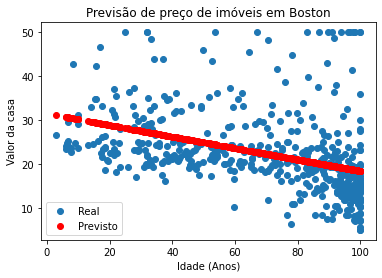

In [13]:
plt.scatter('AGE','target',data=df,label='Real')
plt.scatter(df['AGE'],y_pred_total,label='Previsto',color='R')
plt.xlabel('Idade (Anos)')
plt.ylabel('Valor da casa')
plt.title('Previsão de preço de imóveis em Boston')
plt.legend()

plt.show()


In [14]:
# Separar os valores de atributo e alvo

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

MSE: 2.850915209943344
RMSE: 14.151428653280373
R²: 0.7786146432007703


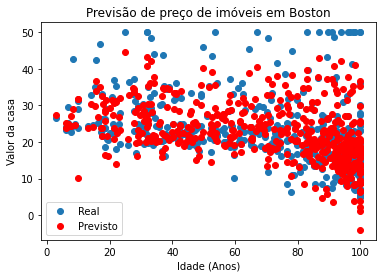

In [15]:
# Chamar a função do Modelo

LinReg = LinearRegression()

# Treinar o modelo

LinReg.fit(X_train,y_train)


# Preizer os valores de teste

y_pred = LinReg.predict(X_test)

# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

y_pred_total = LinReg.predict(X)
plt.scatter('AGE','target',data=df,label='Real')
plt.scatter(df['AGE'],y_pred_total,label='Previsto',color='R')
plt.xlabel('Idade (Anos)')
plt.ylabel('Valor da casa')
plt.title('Previsão de preço de imóveis em Boston')
plt.legend()

plt.show()




# Regressão Linear - Qualidade do Vinho

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/thiagolopes97/ITA/main/winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
#Divisão do dataset em Atributos e Resultado
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']
X = df[feature_cols]
y = df['quality']


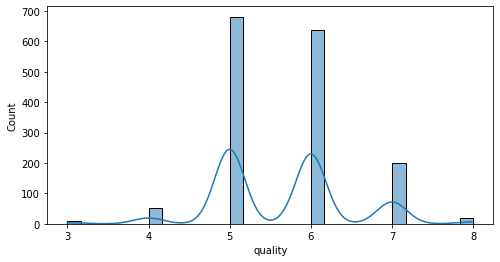

In [21]:
# Plotagem do histograma de qualidade

plt.figure(figsize=(8,4))
plt.tight_layout()
sns.histplot(df['quality'],kde=True)

plt.show()

In [22]:
# Separação do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Treinamento do Dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train);

In [23]:
# Plotagem da influência de cada variável em relação a qualidade do vinho (coeficiente angular)
# Nota: Para cada uma unidada de mudança no atributo, haverá uma mudança na qualidade do vinho de 
# acordo com o coeficiente. Por exemplo, se mudar 1 unidade de densidade, a qualidade do vinho 
# irá mudar -31.5166.

coeff_df = pd.DataFrame(regressor.coef_, feature_cols, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [24]:
y_pred = regressor.predict(X_test)
# Cria a tabela de resultados real e resultado previsto
df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
df1 = df.head(25)
df.sample(5)

,Real,Previsto
175,5,5.527146
1054,6,5.007207
1200,6,5.495650
820,5,5.240388
923,6,5.760432


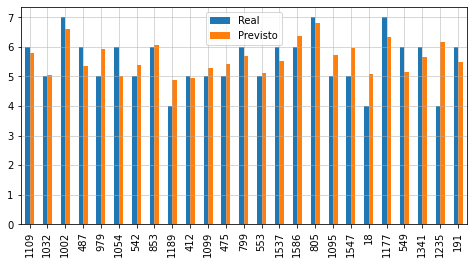

In [25]:
df1.plot(kind='bar',figsize=(8,4))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

In [26]:
# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

MSE: 0.46963309286611105
RMSE: 0.3844711978201246
R²: 0.32838876395802175
